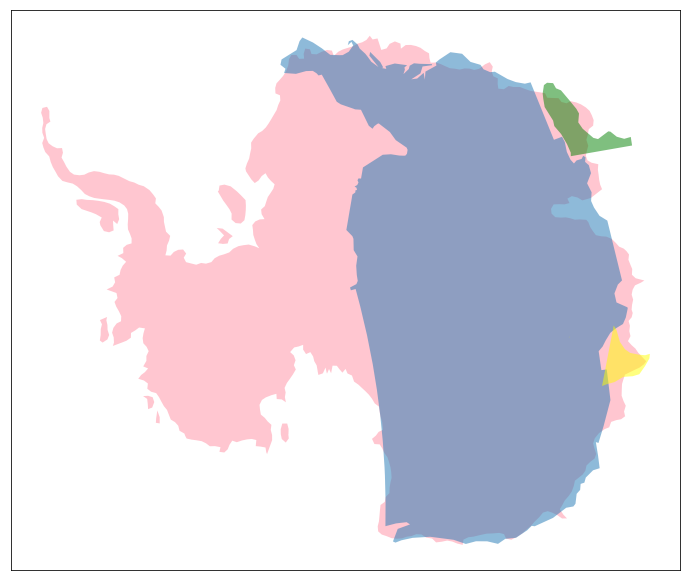

In [178]:
import os
import pandas
import warnings
import geopandas as gpd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import shapely


datadir = '/home/idies/workspace/raddick_census/pop2016'
os.chdir(datadir)

statedir = '/home/idies/workspace/raddick_census/geography/STATE/'
statefile = statedir + 'tl_2016_us_state.shp'
states_geo = gpd.read_file(statefile)
warnings.filterwarnings("ignore")
#import matplotlib.patches as mpatches

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.set_index('iso_a3')

antarctica = world[world['name'] == 'Antarctica']
usa = world[world.index == 'USA']
tx = world[world.index == 'USA']
fl = world[world.index == 'USA']

antarctica = antarctica.to_crs('+proj=aea +lat_1=-82 +lat_2=-82 +lat_0=-90 +lon_0=0.001 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs')

swcorner = (-130, 29)
nwcorner = (-130, 50)
necorner = (-60, 50)
secorner = (-60, 29)
pointlist = [swcorner, nwcorner, necorner, secorner, swcorner]

pgon = shapely.geometry.Polygon([[p[0], p[1]] for p in pointlist])
bbox = pgon.envelope
bbdf = gpd.GeoDataFrame(gpd.GeoSeries(bbox), columns=['geometry'])
bbdf = bbdf.set_geometry('geometry')

usa = gpd.overlay(usa, bbdf, how='intersection')


flswcorner = (-87, 25)
flnwcorner = (-87, 31)
flnecorner = (-79, 31)
flsecorner = (-79, 25)

flpointlist = [flswcorner, flnwcorner, flnecorner, flsecorner, flswcorner]

flpgon = shapely.geometry.Polygon([[p[0], p[1]] for p in flpointlist])
flbbox = flpgon.envelope
flbbdf = gpd.GeoDataFrame(gpd.GeoSeries(flbbox), columns=['geometry'])
flbbdf = flbbdf.set_geometry('geometry')

usa = gpd.overlay(usa, flbbdf, how='difference')
fl = gpd.overlay(fl, flbbdf, how='intersection')


txswcorner = (-105, 25)
txnwcorner = (-105, 29)
txnecorner = (-92, 29)
txsecorner = (-92, 25)

txpointlist = [txswcorner, txnwcorner, txnecorner, txsecorner, txswcorner]

txpgon = shapely.geometry.Polygon([[p[0], p[1]] for p in txpointlist])
txbbox = txpgon.envelope
txbbdf = gpd.GeoDataFrame(gpd.GeoSeries(txbbox), columns=['geometry'])
txbbdf = txbbdf.set_geometry('geometry')
tx = gpd.overlay(tx, txbbdf, how='intersection')

usa.crs = {'init' :'epsg:4326'}
usa = usa.to_crs('+proj=aea +lat_1=29.5 +lat_2=45.5 +lat_0=37.5 +lon_0=-96 +x_0=0 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs')
fl.crs = {'init' :'epsg:4326'}
fl = fl.to_crs('+proj=aea +lat_1=29 +lat_2=31 +lat_0=30 +lon_0=-84 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs')
tx.crs = {'init' :'epsg:4326'}
tx = tx.to_crs('+proj=aea +lat_1=26.5 +lat_2=28.5 +lat_0=27.5 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs')

xfst = 1200000
yfst = -165000

usa.geometry = usa.geometry.apply(lambda x: shapely.affinity.rotate(x, 105))
usa.geometry = usa.geometry.apply(lambda x: shapely.affinity.translate(x, xoff=xfst, yoff=yfst))

txxfst = 2700000
txyfst = -600000
tx.geometry = tx.geometry.apply(lambda x: shapely.affinity.rotate(x, 80))
tx.geometry = tx.geometry.apply(lambda x: shapely.affinity.translate(x, xoff=txxfst, yoff=txyfst))

flxfst = 2100000
flyfst = 1700000
fl.geometry = fl.geometry.apply(lambda x: shapely.affinity.rotate(x, 190))
fl.geometry = fl.geometry.apply(lambda x: shapely.affinity.translate(x, xoff=flxfst, yoff=flyfst))

fig, ax = plt.subplots(figsize=(12,12))
ax.set_aspect('equal')


antarctica.plot(ax=ax, alpha=0.9, color='pink')
usa.plot(ax=ax, alpha=0.5)
fl.plot(ax=ax, alpha=0.5, color='green')
tx.plot(ax=ax, alpha=0.5, color='yellow')

plt.tick_params(axis='both', which='both', left='off', bottom='off', labelleft='off', labelbottom='off') # labels along the bottom edge are off
plt.show()
#usa
#world.head(1)
